In [1]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [2]:
!pip install ultralytics

    extract-msg (<=0.29.*)
                 ~~~~~~~^


In [3]:
from ultralytics import YOLO

In [4]:
from IPython.display import display, Image
import cv2

In [5]:
# Load the image
image_path = "/home/rubi/facedetandcom/123.jpg"
image = cv2.imread(image_path)

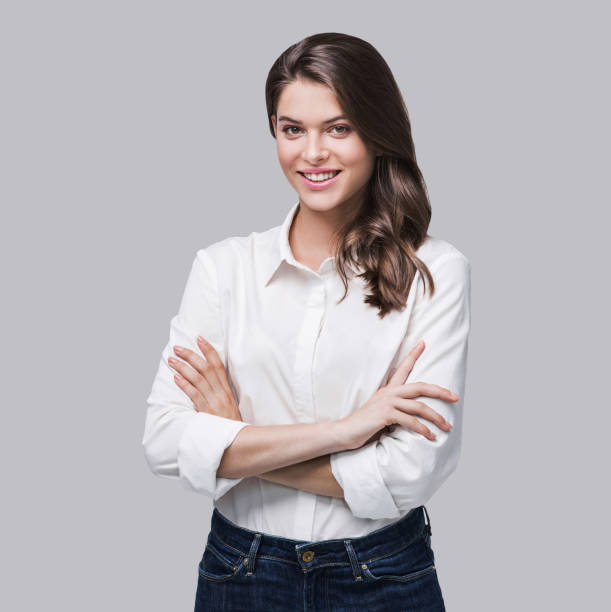

In [6]:
# Display the original image
display(Image(filename=image_path))

In [7]:
# Load a model
model = YOLO('yolov8n.pt')  # official model   |

# Predict with the model
results = model(image_path)

100%|██████████| 6.25M/6.25M [00:01<00:00, 3.68MB/s]


/home/rubi/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


image 1/1 /home/rubi/facedetandcom/123.jpg: 640x640 1 person, 56.6ms
Speed: 4.3ms preprocess, 56.6ms inference, 501.3ms postprocess per image at shape (1, 3, 640, 640)


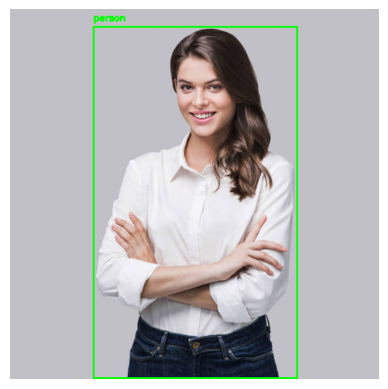

In [8]:
import cv2
import matplotlib.pyplot as plt

# Draw bounding boxes on the image
for pred in results[0].boxes.data:
    label = model.names[int(pred[-1])]
    box = pred[:4].cpu().numpy().astype(int)
    image = cv2.rectangle(image, (box[0], box[1]), (box[2], box[3]), (0, 255, 0), 2)
    image = cv2.putText(image, f"{label}", (box[0], box[1] - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Convert BGR image to RGB for displaying with matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image with bounding boxes
plt.imshow(image_rgb)
plt.axis('off')
plt.show()

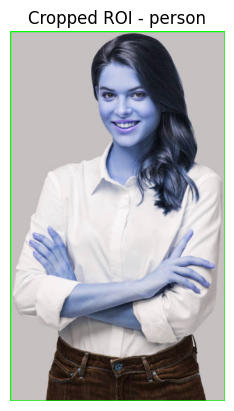

In [9]:
# Iterate over predicted bounding boxes
for pred in results[0].boxes.data:
    label = model.names[int(pred[-1])]
    box = pred[:4].cpu().numpy().astype(int)

    # Crop the ROI based on the bounding box coordinates
    roi = image[box[1]:box[3], box[0]:box[2]]

    # Display the cropped ROI
    plt.imshow(roi)
    plt.title(f"Cropped ROI - {label}")
    plt.axis('off')
    plt.show()
